In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
# Step 1: Scrape data from the Wikipedia URL
url = "https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita"

In [3]:
response = requests.get(url)

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
table = soup.find('table', class_='wikitable sortable')

In [6]:
data = []
headers = []
rows = table.find_all('tr')
for row in rows[1:]:
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)
    if len(headers) == 0:
        headers = [cell.get_text(strip=True) for cell in cells]

In [7]:
df = pd.DataFrame(data, columns=headers)
df = df.dropna()

In [8]:
column_names = ['Rank','State/Union Territory','GDP per capita (in Rs.)','2019-2020 (USD)','2019-2020']
df.columns = column_names
df

,Rank,State/Union Territory,GDP per capita (in Rs.),2019-2020 (USD),2019-2020
0,1,Goa,"₹ 4,35,959","$ 6,227","$ 29,553"
1,2,Sikkim,"₹ 4,03,376","$ 5,762","$ 27,346"
2,3,Delhi,"₹ 3,76,221","$ 5,374","$ 27,213"
3,4,Chandigarh,"₹ 3,30,015","$ 4,714","$ 22,372"
4,5,Haryana,"₹ 2,47,628","$ 3,537","$ 16,786"
5,6,Telangana,"₹ 2,33,325","$ 3,333","$ 15,818"
6,7,Karnataka,"₹ 2,23,175","$ 3,188","$ 15,130"
7,8,Kerala,"₹ 2,21,904","$ 3,170","$ 15,044"
8,9,Puducherry,"₹ 2,20,949","$ 3,156","$ 14,978"
9,10,Andaman and Nicobar Islands,"₹ 2,18,649","$ 3,123","$ 14,821"


In [9]:
df_new=df[['State/Union Territory','GDP per capita (in Rs.)']]
df_new['GDP per capita (in Rs.)'] = df_new['GDP per capita (in Rs.)'].str.replace('₹', '')
df_new['State/Union Territory']=df_new['State/Union Territory'].str.lower()
df_new

C:\Users\Amith R\AppData\Local\Temp\ipykernel_16116\3559081767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['GDP per capita (in Rs.)'] = df_new['GDP per capita (in Rs.)'].str.replace('₹', '')
C:\Users\Amith R\AppData\Local\Temp\ipykernel_16116\3559081767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['State/Union Territory']=df_new['State/Union Territory'].str.lower()


,State/Union Territory,GDP per capita (in Rs.)
0,goa,"4,35,959"
1,sikkim,"4,03,376"
2,delhi,"3,76,221"
3,chandigarh,"3,30,015"
4,haryana,"2,47,628"
5,telangana,"2,33,325"
6,karnataka,"2,23,175"
7,kerala,"2,21,904"
8,puducherry,"2,20,949"
9,andaman and nicobar islands,"2,18,649"


In [10]:
df_new['State/Union Territory'] = df_new['State/Union Territory'].str.replace('\[.*\]', '', regex=True)
df_new['GDP per capita (in Rs.)'] = df_new['GDP per capita (in Rs.)'].str.replace(',', '').astype(int)

C:\Users\Amith R\AppData\Local\Temp\ipykernel_16116\4113967355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['State/Union Territory'] = df_new['State/Union Territory'].str.replace('\[.*\]', '', regex=True)
C:\Users\Amith R\AppData\Local\Temp\ipykernel_16116\4113967355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['GDP per capita (in Rs.)'] = df_new['GDP per capita (in Rs.)'].str.replace(',', '').astype(int)


In [11]:
shapefile_path = r"C:\Users\Amith R\Downloads\India Shapefile With Kashmir\India Shape\india_st.shp"
gdf = gpd.read_file(shapefile_path)


In [12]:

gdf['STATE']=gdf['STATE'].str.lower()
gdf

,STATE,geometry
0,andaman and nicobar islands,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,andhra pradesh,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,arunachal pradesh,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,assam,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,bihar,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."
5,chandigarh,"POLYGON ((76.85168 30.75696, 76.85275 30.70596..."
6,dadra and nagar haveli,"POLYGON ((72.99248 20.22041, 72.96240 20.28906..."
7,daman and diu,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20..."
8,delhi,"POLYGON ((76.92160 28.78554, 77.11057 28.83400..."
9,goa,"POLYGON ((73.70534 15.71924, 73.83531 15.77222..."


In [13]:
merged_data = gdf.merge(df_new, left_on='STATE', right_on='State/Union Territory', how='left')
merged_data

,STATE,geometry,State/Union Territory,GDP per capita (in Rs.)
0,andaman and nicobar islands,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",andaman and nicobar islands,218649.0
1,andhra pradesh,"POLYGON ((82.00063 17.95354, 82.11718 18.02457...",andhra pradesh,168480.0
2,arunachal pradesh,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",arunachal pradesh,169742.0
3,assam,"POLYGON ((92.82207 25.57781, 92.69672 25.61368...",assam,86801.0
4,bihar,"POLYGON ((84.16946 26.28322, 83.91399 26.38523...",bihar,46292.0
5,chandigarh,"POLYGON ((76.85168 30.75696, 76.85275 30.70596...",chandigarh,330015.0
6,dadra and nagar haveli,"POLYGON ((72.99248 20.22041, 72.96240 20.28906...",NaN,NaN
7,daman and diu,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20...",NaN,NaN
8,delhi,"POLYGON ((76.92160 28.78554, 77.11057 28.83400...",delhi,376221.0
9,goa,"POLYGON ((73.70534 15.71924, 73.83531 15.77222...",goa,435959.0


(66.90341350000001, 98.91729649999999, 5.21859705, 38.549783950000005)

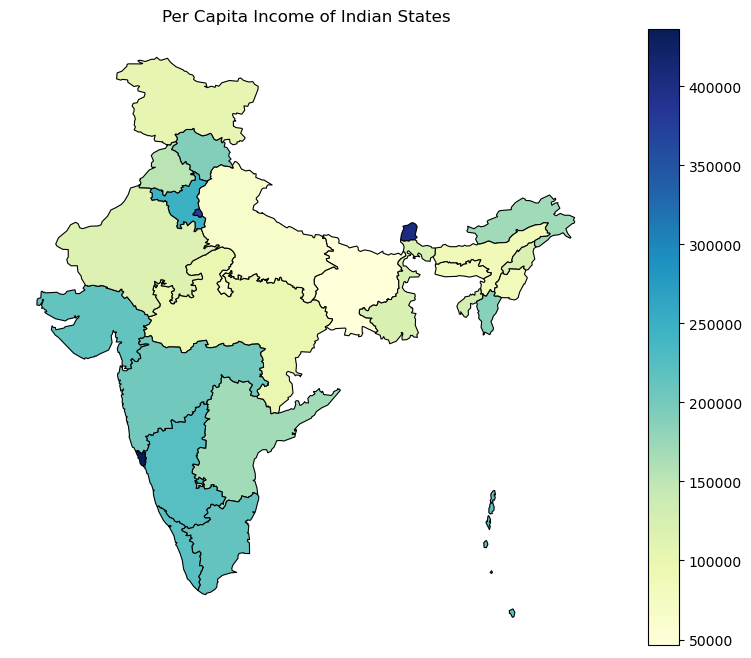

In [107]:
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='GDP per capita (in Rs.)', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='k', legend=True)
ax.set_title('Per Capita Income of Indian States')
ax.axis('off')